# 📌 Parte 1: Rompiendo ECB en Imágenes
## 📍 Escenario: Un usuario almacena imágenes sensibles cifradas con AES-ECB. Los atacantes descubren que pueden extraer patrones de la imagen.

 

🔹 Instrucciones:
tux.ppm.zip Descargar tux.ppm.zip(Pueden usar a tux para hacer pruebas y luego utilizar una imagen distinta)

1.Utiliza una imagen BMP o PPM en escala de grises.

2.Cifrar la imagen con AES en modo ECB y visualizar el resultado.

3.Cifrar la misma imagen con AES en modo CBC y comparar.

In [ ]:
from PIL import Image
import numpy as np
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Random import get_random_bytes

image = Image.open("tux.ppm").convert("L")
image_array = np.array(image)

image_bytes = image_array.tobytes()

key = b"clave_secreta_16"


height, width = image_array.shape

cipher_ecb = AES.new(key, AES.MODE_ECB)
ciphered_data_ecb = cipher_ecb.encrypt(pad(image_bytes, AES.block_size))


image_ecb = np.frombuffer(ciphered_data_ecb, dtype=np.uint8)[:width * height].reshape((height, width))
Image.fromarray(image_ecb).save("tux_ecb.png") 

# ---- MODO CBC ----
iv = get_random_bytes(16) 
cipher_cbc = AES.new(key, AES.MODE_CBC, iv)
ciphered_data_cbc = cipher_cbc.encrypt(pad(image_bytes, AES.block_size))

# Convertir a array numpy y reconstruir imagen
image_cbc = np.frombuffer(ciphered_data_cbc, dtype=np.uint8)[:width * height].reshape((height, width))
Image.fromarray(image_cbc).save("tux_cbc.png")  

print(" ¡Cifrado completado! Se generaron tux_ecb.png y tux_cbc.png")



✅ ¡Cifrado completado! Se generaron tux_ecb.png y tux_cbc.png


Imagen nueva


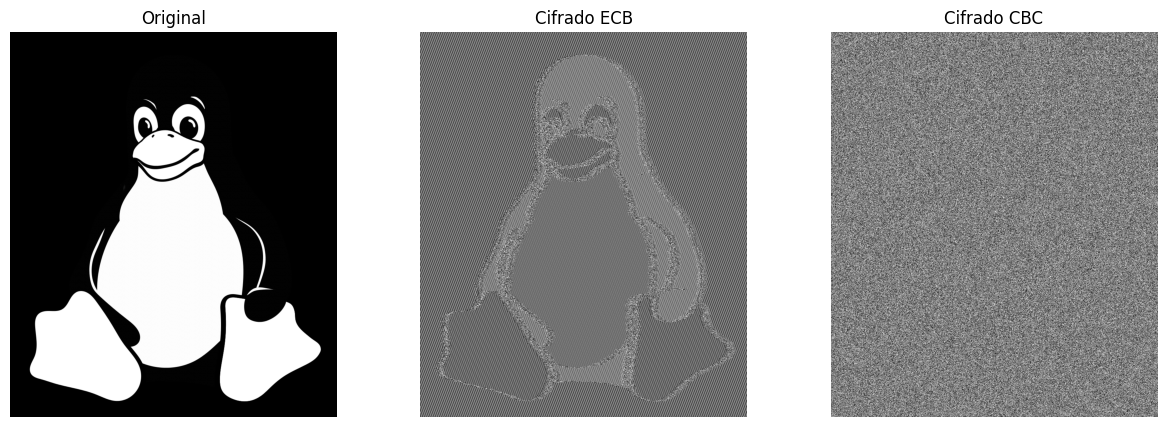

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image


imagenes = {
    "Original": "tux.ppm",
    "Cifrado ECB": "tux_ecb.png",
    "Cifrado CBC": "tux_cbc.png"
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (titulo, archivo) in enumerate(imagenes.items()):
    try:
    
        image = Image.open(archivo).convert("L")
        axes[i].imshow(image, cmap="gray")
        axes[i].set_title(titulo)
        axes[i].axis("off")
    except FileNotFoundError:
        print(f"⚠️ No se encontró el archivo: {archivo}")


plt.show()


In [4]:
from PIL import Image

# Cargar imagen en escala de grises
image = Image.open("python.png").convert("L")

# Guardar como PPM
image.save("imagen_nueva.ppm")


In [ ]:
from PIL import Image
import numpy as np
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Random import get_random_bytes

# Cargar imagen en escala de grises
image = Image.open("imagen_nueva.ppm").convert("L")
image_array = np.array(image)

# Convertir imagen a bytes
image_bytes = image_array.tobytes()

# Clave AES de 16 bytes
key = b"clave_secreta_16"


height, width = image_array.shape

# ---- MODO ECB ----
cipher_ecb = AES.new(key, AES.MODE_ECB)
ciphered_data_ecb = cipher_ecb.encrypt(pad(image_bytes, AES.block_size))

image_ecb = np.frombuffer(ciphered_data_ecb, dtype=np.uint8)[:width * height].reshape((height, width))
Image.fromarray(image_ecb).save("gato_ecb.png")  

# ---- MODO CBC ----
iv = get_random_bytes(16)  # Generar IV aleatorio
cipher_cbc = AES.new(key, AES.MODE_CBC, iv)
ciphered_data_cbc = cipher_cbc.encrypt(pad(image_bytes, AES.block_size))

# Convertir a array numpy y reconstruir imagen
image_cbc = np.frombuffer(ciphered_data_cbc, dtype=np.uint8)[:width * height].reshape((height, width))
Image.fromarray(image_cbc).save("gato_cbc.png") 



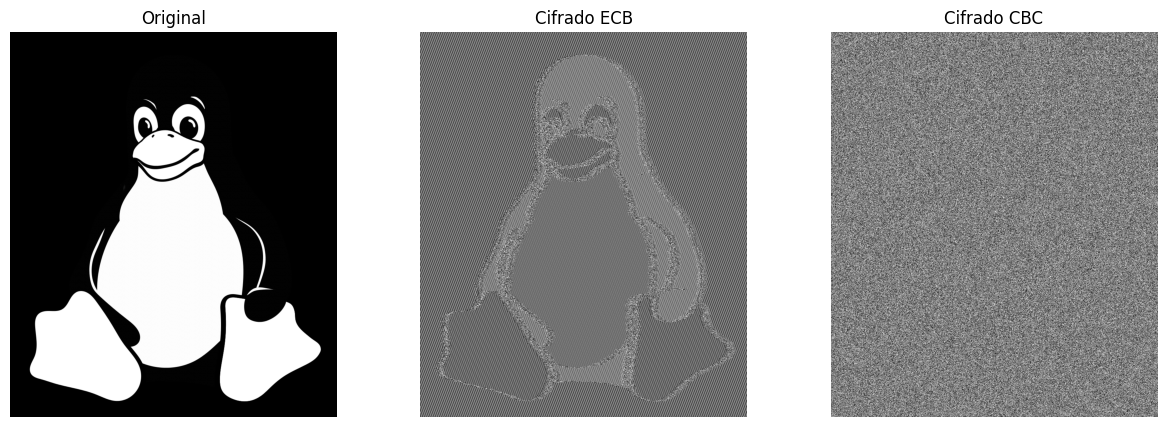

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image


imagenes = {
    "Original": "tux.ppm",
    "Cifrado ECB": "tux_ecb.png",
    "Cifrado CBC": "tux_cbc.png"
}


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (titulo, archivo) in enumerate(imagenes.items()):
    try:
 
        image = Image.open(archivo).convert("L")

        axes[i].imshow(image, cmap="gray")
        axes[i].set_title(titulo)
        axes[i].axis("off")
    except FileNotFoundError:
        print(f" No se encontró el archivo: {archivo}")


plt.show()


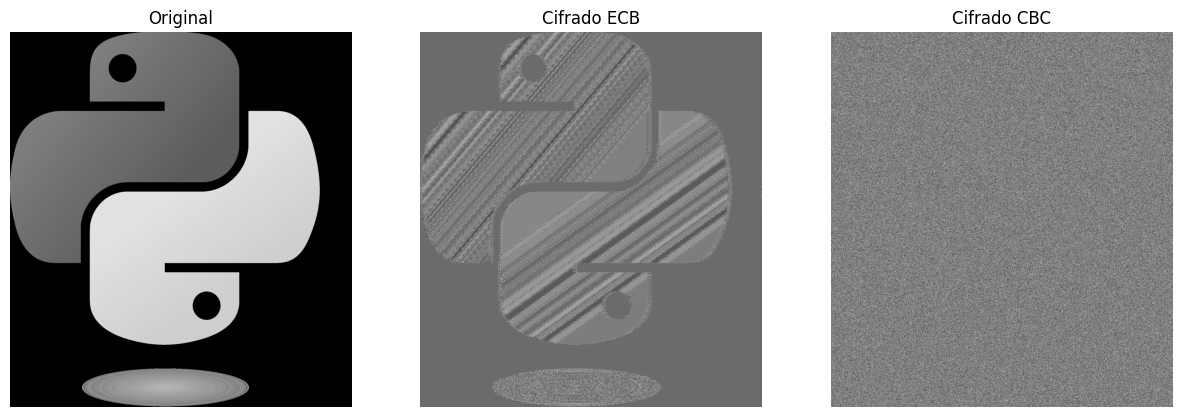

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image


imagenes = {
    "Original": "imagen_nueva.ppm",
    "Cifrado ECB": "gato_ecb.png",
    "Cifrado CBC": "gato_cbc.png"
}


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (titulo, archivo) in enumerate(imagenes.items()):
    try:
        image = Image.open(archivo).convert("L")

      
        axes[i].imshow(image, cmap="gray")
        axes[i].set_title(titulo)
        axes[i].axis("off")
    except FileNotFoundError:
        print(f"⚠️ No se encontró el archivo: {archivo}")

plt.show()
